# Markov Chain

In [2]:
import numpy as np
import random as rm
import matplotlib.pyplot as plt
from scipy.stats import rv_discrete

Set the transition matrix and compute the stationary (initial) distribution

In [3]:
# transition matrix
p_transition = np.array(
    [[0.90, 0.05, 0.05],
     [0.01, 0.90, 0.09],
     [0.07, 0.03, 0.9]]
)

# stationary distribution
def dist_stationary(p_transition):
    n_states = p_transition.shape[0]
    A = np.append(
        arr=p_transition.T - np.eye(n_states),
        values=np.ones(n_states).reshape(1, -1),
        axis=0
    )
    b = np.transpose(np.array([0] * n_states + [1]))
    p_stationary = np.linalg.solve(
        a=np.transpose(A).dot(A),
        b=np.transpose(A).dot(b)
    )
    return p_stationary

p_init = dist_stationary(p_transition)


In [4]:
from scipy.stats import multinomial
from typing import List

def markov_sequence(p_init: np.array, p_transition: np.array, sequence_length: int) -> List[int]:
    """
    Generate a Markov sequence based on p_init and p_transition.
    """
    if p_init is None:
        p_init = equilibrium_distribution(p_transition)
    initial_state = list(multinomial.rvs(1, p_init)).index(1)

    states = [initial_state]
    for _ in range(sequence_length - 1):
        p_tr = p_transition[states[-1]]
        new_state = list(multinomial.rvs(1, p_tr)).index(1)
        states.append(new_state)
    return states

([<matplotlib.axis.YTick at 0x7377d5739970>,
 [Text(0, 0, '0'), Text(0, 1, '1'), Text(0, 2, '2')])

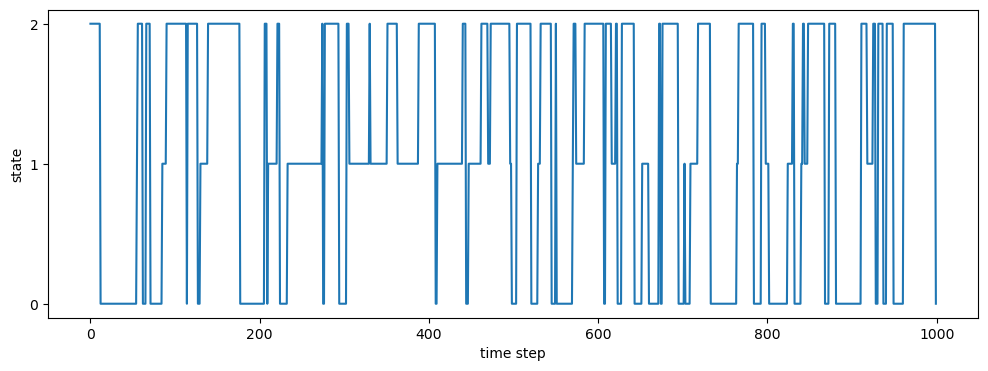

In [5]:
N = 1000
x = markov_sequence(p_init, p_transition, sequence_length=N)
fig, ax = plt.subplots(figsize=(12, 4))
plt.plot(x)
plt.xlabel("time step")
plt.ylabel("state")
plt.yticks([0, 1, 2])

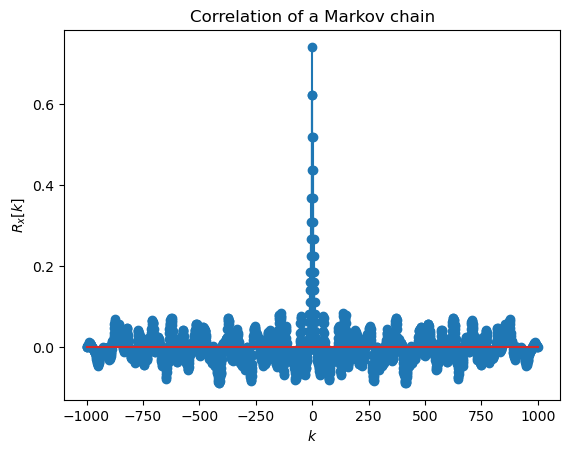

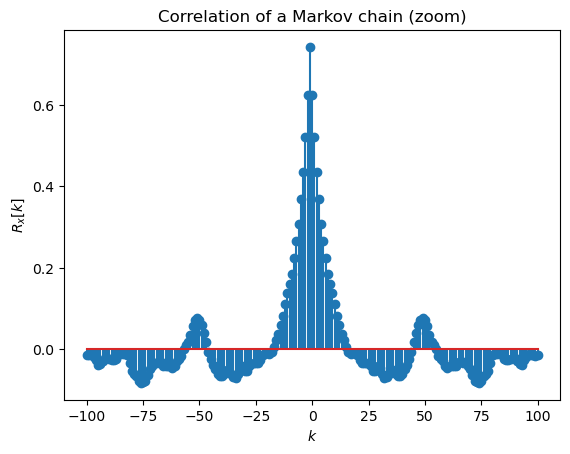

In [6]:
# center the samples of the Markov chain
x0 = x - np.mean(x)

# estimate the correlation
# notice that in order to use the biased correlation the process needs to
# be centered!
Rx = np.correlate(x0, x0, mode='full') / len(x0)



# plot the correlation
plt.figure()
plt.stem(np.arange(-N+1, N), Rx)
plt.title('Correlation of a Markov chain')
plt.ylabel('$R_x[k]$')
plt.xlabel('$k$')
plt.show()

plt.figure()
plt.stem(np.arange(-100, 101), Rx[N-100:N+101])
plt.title('Correlation of a Markov chain (zoom)')
plt.ylabel('$R_x[k]$')
plt.xlabel('$k$')
plt.show()